# **Advanced Image Classification with Transfer**

# Advanced Image Classification with Transfer Learning

This project demonstrates the use of transfer learning to classify images from the CIFAR-10 dataset using the pre-trained VGG16 model. The steps involved in this project include:

1. **Setup and Data Preparation**:
   - Load the CIFAR-10 dataset and normalize the pixel values.
   - Convert class vectors to binary class matrices (one-hot encoding).
   - Use ImageDataGenerator for data augmentation to improve model generalization.

2. **Load and Adapt Pre-trained Model**:
   - Load the VGG16 model pre-trained on ImageNet, excluding its top layers.
   - Add custom top layers suitable for CIFAR-10 classification.
   - Unfreeze the last few layers of the base model to allow fine-tuning.

3. **Compile and Train the Model**:
   - Compile the model with the SGD optimizer and categorical crossentropy loss function.
   - Train the model using the augmented training data.
   - Save the trained model.

4. **Evaluate the Model**:
   - Evaluate the model's performance on the test dataset.
   - Plot the training and validation accuracy and loss over epochs.

By following these steps, we leverage the power of transfer learning and data augmentation to enhance the performance of the image classification model on the CIFAR-10 dataset.


Step 1: Setup and Data Preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.optimizers import SGD  # Importing SGD optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Enhanced ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)


Step 2: Load and Adapt Pre-trained Model

In [ ]:
# Load the pre-trained VGG16 model, excluding the top layers
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Unfreeze the last few layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Add custom top layers for CIFAR-10 classification with Batch Normalization
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Step 3: Train the Model

In [ ]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test))

# Save the model
model.save('cifar10_vgg16_improved.h5')


Epoch 1/20
782/782 [==============================] - 54s 62ms/step - loss: 1.2880 - accuracy: 0.5539 - val_loss: 1.2360 - val_accuracy: 0.6219
Epoch 2/20
782/782 [==============================] - 46s 58ms/step - loss: 0.8894 - accuracy: 0.6931 - val_loss: 0.7325 - val_accuracy: 0.7517
Epoch 3/20
782/782 [==============================] - 47s 60ms/step - loss: 0.7779 - accuracy: 0.7327 - val_loss: 0.5700 - val_accuracy: 0.7995
Epoch 4/20
782/782 [==============================] - 46s 59ms/step - loss: 0.7108 - accuracy: 0.7580 - val_loss: 0.6021 - val_accuracy: 0.7967
Epoch 5/20
782/782 [==============================] - 46s 59ms/step - loss: 0.6585 - accuracy: 0.7748 - val_loss: 0.5291 - val_accuracy: 0.8242
Epoch 6/20
782/782 [==============================] - 46s 58ms/step - loss: 0.6208 - accuracy: 0.7876 - val_loss: 0.5292 - val_accuracy: 0.8238
Epoch 7/20
782/782 [==============================] - 45s 58ms/step - loss: 0.5920 - accuracy: 0.7994 - val_loss: 0.5272 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Step 4: Evaluate the Model

313/313 [==============================] - 3s 11ms/step - loss: 0.4312 - accuracy: 0.8564
Test accuracy: 0.8564000129699707


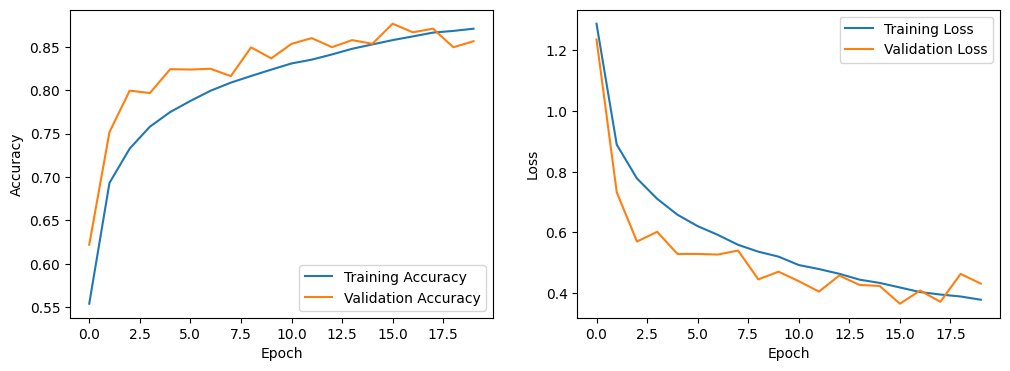

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
